In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import confusion_matrix
import pandas as pd
%matplotlib inline

#IRIS CLASSIFICATION USING ONE HIDDEN LAYER NEURAL NET
#LAYER 1 ACITIVATION FUNCTION IS SIGMOID
#LAYER 2 ACTIVIATION FUNCTION IS SOFTMAX FOR PREDICTING CLASS LABEL

In [4]:
#GRID PLOT FOR THE 4 FEATURES TO TRAIN ON
dataset = pd.read_csv('irisdata.txt')

#REPLACE ALL SPECIES NAMES WITH A 0,1,2
species_names = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
species_values = [0,1,2]
dataset.replace(species_names,species_values,inplace=True)

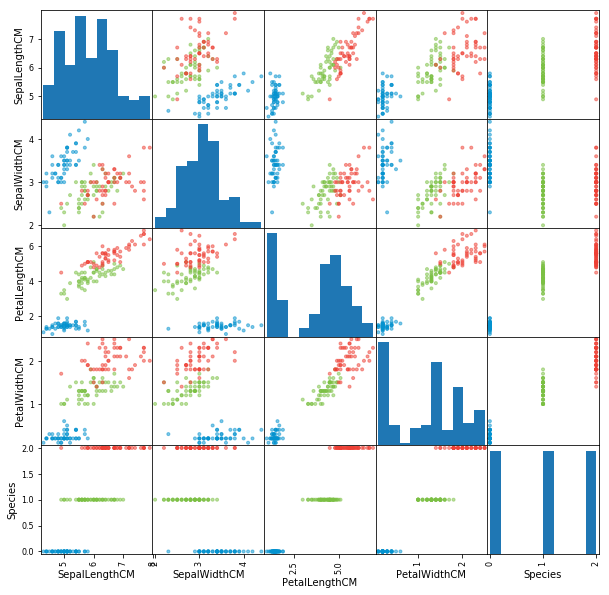

     SepalLengthCM  SepalWidthCM  PetalLengthCM  PetalWidthCM
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
5              5.4           3.9            1.7           0.4
6              4.6           3.4            1.4           0.3
7              5.0           3.4            1.5           0.2
8              4.4           2.9            1.4           0.2
9              4.9           3.1            1.5           0.1
10             5.4           3.7            1.5           0.2
11             4.8           3.4            1.6           0.2
12             4.8           3.0            1.4           0.1
13             4.3           3.0            1.1           0.1
14             5.8           4.0            1.2           0.2
15      

In [6]:
color_wheel = {0: "#0392cf", 
               1: "#7bc043", 
               2: "#ee4035"}
colors = dataset["Species"].map(lambda x: color_wheel.get(x))
pd.scatter_matrix(dataset,figsize=(10,10), c = colors)
plt.show()

Xmother = dataset.loc[:,'SepalLengthCM':'PetalWidthCM':1]
Ymother = dataset.loc[:,'Species':'Species':1]

X, X_test, y, y_test = train_test_split(Xmother, Ymother, test_size= 0.25 , random_state=42)

In [1288]:
#ONEHOT INDEXING FOR MULTICLASS DATA
#CREATING A N X C MATRIX FOR N DATA POINTS AND C CLASSES
l_class_labels = y['Species'].values
Y_true = l_class_labels
Y = np.zeros((len(l_class_labels),np.amax(l_class_labels+1)))
row = 0
for label in l_class_labels:    
    Y[row][label] = 1
    row+=1

In [1289]:
#SET NEURAL NET MODEL PROPERTIES 
n_features = 4 #NUMBER OF FEATURES FOR EACH TRAINING DATA
n_hidden_nodes = 10 #NUMBER OF NODES IN THE HIDDEN LAYER
np.random.seed(2)
n_classes = 3 #NUMBER OF KNOWN CLASSES IN DATA SET 
n_events = len(X) #SIZE OF TRAINING DATA

learning_rate = 1e-2 

#INIT WEIGHTS BETWEEN INPUT LAYER AND LAYER1 (HIDDEN LAYER), F x H matrix (F = feature, H = hidden nodes)
w1 = np.random.randn(n_features,n_hidden_nodes) 
b1 = np.zeros((1,n_hidden_nodes)) #BIAS TO EACH NODE IN THE HIDDEN LAYER

#INIT WEIGHTS BETWEEN LAYER1 AND LAYER2 (OUTPUT), H x C ( H = hidden notes, C = number of classes )
w2 = np.random.randn(n_hidden_nodes,n_classes) 
b2 = np.zeros((1,n_classes)) #BIAS TO EACH OUTPUT NODE

In [1290]:
def softmax(X):
    temp1 = np.exp(X)
    temp2 = np.sum((1 + np.exp(X)),axis=1, keepdims=True)
    return temp1/temp2

def sigmoid(x,deriv=False):
    if( deriv ):
        return x*(1-x)
    return 1/(1+ np.exp(-x))

In [1291]:
max_iter = 3000
reg = 1e-5 #FOR REGULARIZATION
l_loss = np.zeros(max_iter)
for i in range(max_iter):
         
    z1 = np.dot(X,w1) + b1
    L1 = sigmoid(z1)
    z2 = np.dot(L1,w2) + b2
    L2 = softmax(z2)
        
    error_l2 = (L2 - Y)/n_events
    dw2 = np.dot(L1.T,error_l2) + reg*w2
    db2 = np.sum(error_l2,axis=0, keepdims=True)
    
    error_l1 = np.dot(error_l2,w2.T) #ERROR IN HIDDEN LAYER
    delta_l1 = 0.5 * error_l1 * sigmoid(L1,True)
    
    dw1 = np.dot(X.T,error_l1) + reg*w1
    db1 = np.sum(error_l1,axis=0, keepdims=True)
    
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    
    log_loss = -1.0/n_events * np.sum( Y * np.log(L2) )  +  reg*0.5*np.sum(w1*w1) + reg*0.5*np.sum(w2*w2)
    l_loss[i] = log_loss        

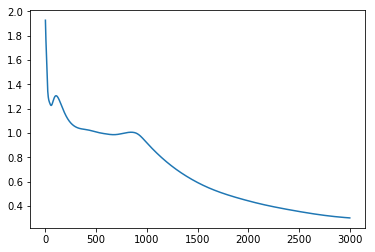

In [1292]:
plt.plot(l_loss)

In [1293]:
#UNDO ONEHOT ENCODING
Y_pred = np.zeros(len(X))
item_j = 0
for item in L2:
    temp_max = 0
    max_index = 0
    for c in range(len(item)):    
        if( item[c] > temp_max ):
            temp_max = item[c]
            max_index = c
    Y_pred[item_j] = max_index # THIS IS THE CLASS LABEL
    item_j+=1
        
confusion_matrix(Y_true,Y_pred)

array([[35,  0,  0],
       [ 0, 37,  2],
       [ 0,  0, 38]])